In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import shutil

In [4]:
# Read the GeoPackage file
data = gpd.read_file('tilesFilter/70W_0N.gpkg')
data.crs = 'EPSG:4326'
data2 = gpd.read_file('tilesFilter/90W_3S.gpkg')
data2.crs = 'EPSG:4326'
land = gpd.read_file('tilesFilter/globalLand.gpkg')

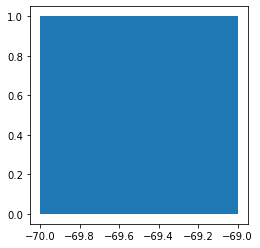

In [5]:
# Plot the GeoPackage data
data.plot()

# Display the plot
plt.show()

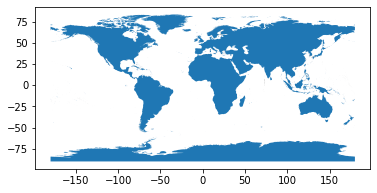

In [7]:
# Plot the GeoPackage data
land.plot()

# Display the plot
plt.show()

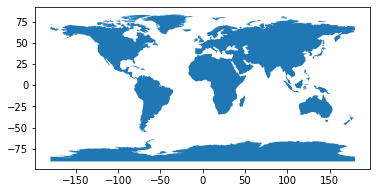

In [8]:
# Select the first geometry
geometry = land['geometry'][0]

# Create a new GeoDataFrame with the selected geometry
land_selected = gpd.GeoDataFrame(geometry=[geometry])
land_selected.crs = 'EPSG:4326'
# Plot the selected geometry
land_selected.plot()

# Display the plot
plt.show()

In [9]:
data.intersects(land_selected).bool()

True

In [10]:
data2.intersects(land_selected).bool()

False

In [12]:
# get list of all tiles 
# path of tiles 
## /gpfs/data1/vclgp/xiongl/GEDIglobal/tiles
import os

# Specify the directory path
directory = '/gpfs/data1/vclgp/xiongl/GEDIglobal//pythonTiles/tiles'

# List all files in the directory
files = os.listdir(directory)
print(len(files ))



72


In [13]:
print(directory + files[1] )

/gpfs/data1/vclgp/xiongl/GEDIglobal//pythonTiles/tiles180W_30S.gpkg


In [14]:
# Print the list of files[:10]
for file in files:
    f = directory +'/' +file
    #print(f)
    # Read the GeoPackage file
    data = gpd.read_file(f)
    data.crs = 'EPSG:4326'
    # Print the result
    if data.intersects(land_selected).bool():
      #print("The geometries have overlaps.")
      #print(f)
      # Copy the file
      shutil.copy(f, '/gpfs/data1/vclgp/xiongl/GEDIglobal/pythonTiles/tilesFilter/data/')